In [161]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

## 1. Data Processing and Preparation

In [162]:
credit = pd.read_csv('Resources/credit-approval_csv - pandas.csv')
credit

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [163]:
#get summary of numeric columns
credit.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [164]:
# Replace "?" with NaN
credit.replace('?', np.NaN, inplace = True)
# Convert Age to numeric
credit["Age"] = pd.to_numeric(credit["Age"])
# credit_copy = credit[:,:]
#credit_copy = credit.copy()

In [165]:
#replace missing values with mean values of numeric columns
credit.fillna(credit.mean(), inplace=True)

In [166]:
def imputeWithMode(df):
    """ 
    Going through each columns and checking the type is object
    if it is object, impute it with most frequent value
    """
    for col in df:
        if df[col].dtypes == 'object':
            df[col] = df[col].fillna(df[col].mode().iloc[0])
imputeWithMode(credit)

In [167]:
credit_drop=credit

In [168]:
credit_drop=credit.drop(["ZipCode"],axis=1)

In [169]:
credit_drop

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,750,-


In [170]:
credit_drop.describe

<bound method NDFrame.describe of     Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
0        b  30.83   0.000       u            g              w         v   
1        a  58.67   4.460       u            g              q         h   
2        a  24.50   0.500       u            g              q         h   
3        b  27.83   1.540       u            g              w         v   
4        b  20.17   5.625       u            g              w         v   
..     ...    ...     ...     ...          ...            ...       ...   
685      b  21.08  10.085       y            p              e         h   
686      a  22.67   0.750       u            g              c         v   
687      a  25.25  13.500       y            p             ff        ff   
688      b  17.92   0.205       u            g             aa         v   
689      b  35.00   3.375       u            g              c         h   

     YearsEmployed PriorDefault Employed  CreditScore DriversLice

In [171]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in credit_drop:
    if credit_drop[col].dtypes=='object':
        credit_drop[col]=LE.fit_transform(credit_drop[col])

In [172]:
credit_drop.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0


In [173]:
#HOT ENCODER
#convert to categorical data to dummy data
credit_dummies = pd.get_dummies(credit_drop, columns=[ "Married","EducationLevel", "Citizen", "DriversLicense", "Ethnicity"])
credit_dummies.head()

,Gender,Age,Debt,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved,...,DriversLicense_1,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5,Ethnicity_6,Ethnicity_7,Ethnicity_8
0,1,30.83,0.000,0,1.25,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,58.67,4.460,0,3.04,1,1,6,560,0,...,0,0,0,0,1,0,0,0,0,0
2,0,24.50,0.500,0,1.50,1,0,0,824,0,...,0,0,0,0,1,0,0,0,0,0
3,1,27.83,1.540,0,3.75,1,1,5,3,0,...,1,0,0,0,0,0,0,0,1,0
4,1,20.17,5.625,0,1.71,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [174]:
credit_dummies.columns

Index(['Gender', 'Age', 'Debt', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'Income', 'Approved',
       'Married_0', 'Married_1', 'Married_2', 'EducationLevel_0',
       'EducationLevel_1', 'EducationLevel_2', 'EducationLevel_3',
       'EducationLevel_4', 'EducationLevel_5', 'EducationLevel_6',
       'EducationLevel_7', 'EducationLevel_8', 'EducationLevel_9',
       'EducationLevel_10', 'EducationLevel_11', 'EducationLevel_12',
       'EducationLevel_13', 'Citizen_0', 'Citizen_1', 'Citizen_2',
       'DriversLicense_0', 'DriversLicense_1', 'Ethnicity_0', 'Ethnicity_1',
       'Ethnicity_2', 'Ethnicity_3', 'Ethnicity_4', 'Ethnicity_5',
       'Ethnicity_6', 'Ethnicity_7', 'Ethnicity_8'],
      dtype='object')

In [175]:
#credit_dummies=credit_drop

In [176]:
credit_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             690 non-null    int32  
 1   Age                690 non-null    float64
 2   Debt               690 non-null    float64
 3   BankCustomer       690 non-null    int32  
 4   YearsEmployed      690 non-null    float64
 5   PriorDefault       690 non-null    int32  
 6   Employed           690 non-null    int32  
 7   CreditScore        690 non-null    int64  
 8   Income             690 non-null    int64  
 9   Approved           690 non-null    int32  
 10  Married_0          690 non-null    uint8  
 11  Married_1          690 non-null    uint8  
 12  Married_2          690 non-null    uint8  
 13  EducationLevel_0   690 non-null    uint8  
 14  EducationLevel_1   690 non-null    uint8  
 15  EducationLevel_2   690 non-null    uint8  
 16  EducationLevel_3   690 non

In [177]:
credit_dummies.describe()

,Gender,Age,Debt,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved,...,DriversLicense_1,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5,Ethnicity_6,Ethnicity_7,Ethnicity_8
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,...,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.568171,4.758725,0.475362,2.223406,0.523188,0.427536,2.40000,1017.385507,0.555072,...,0.457971,0.085507,0.008696,0.082609,0.20000,0.011594,0.005797,0.002899,0.591304,0.011594
std,0.460464,11.853273,4.978163,0.850238,3.346513,0.499824,0.495080,4.86294,5210.102598,0.497318,...,0.498592,0.279838,0.092912,0.275490,0.40029,0.107128,0.075973,0.053799,0.491949,0.107128
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,0.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,28.625000,2.750000,0.000000,1.000000,1.000000,0.000000,0.00000,5.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,37.707500,7.207500,0.000000,2.625000,1.000000,1.000000,3.00000,395.500000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,80.250000,28.000000,2.000000,28.500000,1.000000,1.000000,67.00000,100000.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


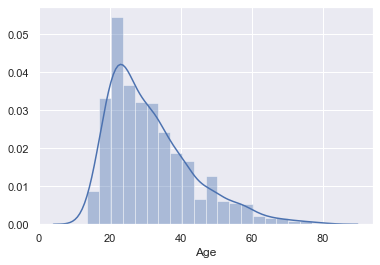

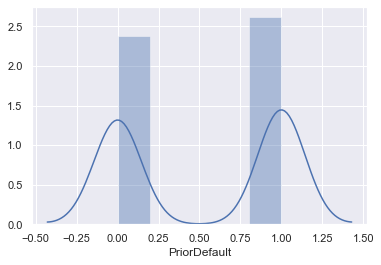

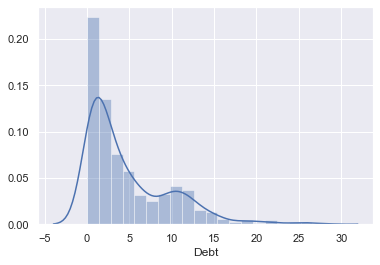

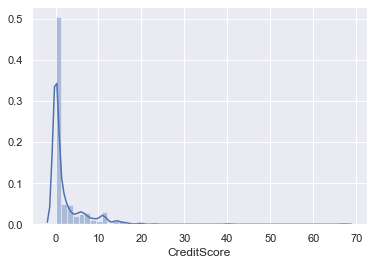

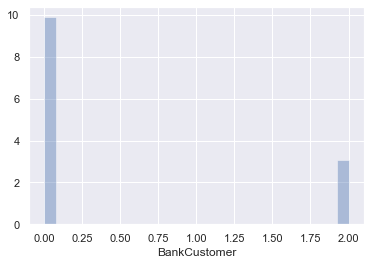

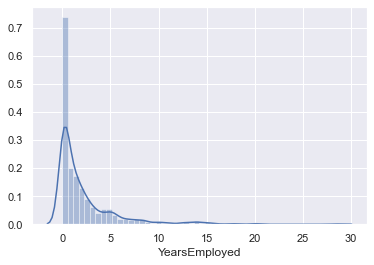

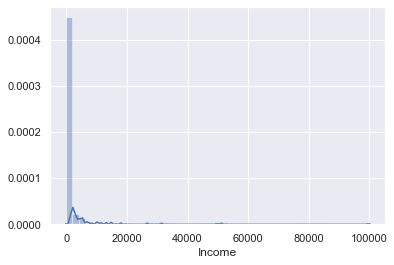

<Figure size 432x288 with 0 Axes>

In [178]:
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    
    
    sns.distplot(col)
    plt.show()
    
plotDistPlot(credit_drop['Age'])
plotDistPlot(credit_drop['PriorDefault'])
plotDistPlot(credit_drop['Debt'])
plotDistPlot(credit_drop['CreditScore'])
plotDistPlot(credit_drop['BankCustomer'])
plotDistPlot(credit_drop['YearsEmployed'])
plotDistPlot(credit_drop['Income'])
plt.savefig('Distribution.jpeg')

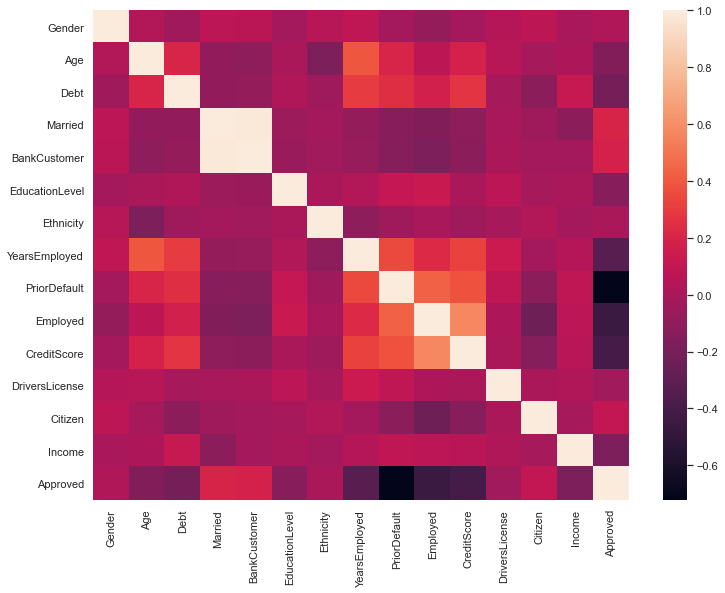

In [179]:
#correlation matrix
corr = credit_drop.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.savefig('corelation.jpg')

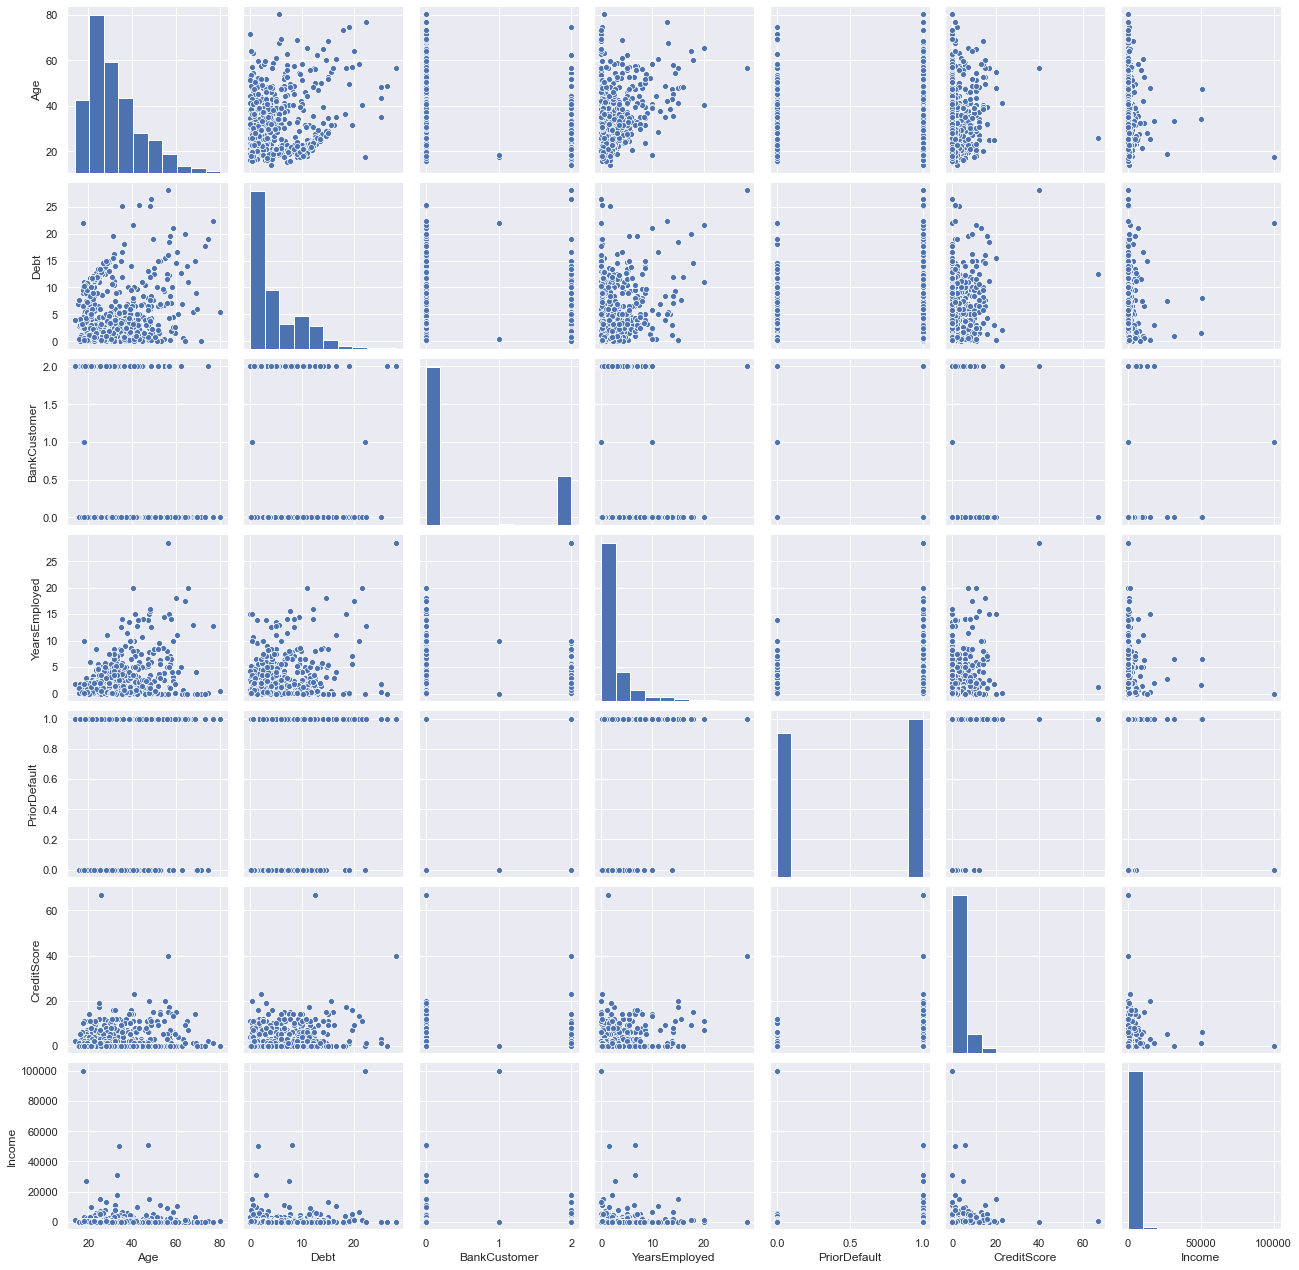

<Figure size 432x288 with 0 Axes>

In [180]:
#scatterplot
sns.set()
cols = ['Age', 'Debt', 'BankCustomer','YearsEmployed','PriorDefault','CreditScore','Income']
sns.pairplot(credit_drop[cols], size = 2.5)
plt.show();
plt.savefig('scatterplot.jpg')

## 2. Data Modelling 

In [181]:
credit_dummies.columns

Index(['Gender', 'Age', 'Debt', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'Income', 'Approved',
       'Married_0', 'Married_1', 'Married_2', 'EducationLevel_0',
       'EducationLevel_1', 'EducationLevel_2', 'EducationLevel_3',
       'EducationLevel_4', 'EducationLevel_5', 'EducationLevel_6',
       'EducationLevel_7', 'EducationLevel_8', 'EducationLevel_9',
       'EducationLevel_10', 'EducationLevel_11', 'EducationLevel_12',
       'EducationLevel_13', 'Citizen_0', 'Citizen_1', 'Citizen_2',
       'DriversLicense_0', 'DriversLicense_1', 'Ethnicity_0', 'Ethnicity_1',
       'Ethnicity_2', 'Ethnicity_3', 'Ethnicity_4', 'Ethnicity_5',
       'Ethnicity_6', 'Ethnicity_7', 'Ethnicity_8'],
      dtype='object')

In [182]:
from sklearn.model_selection import train_test_split
# remove irrelevant features

In [183]:
#credit_drop=credit.drop(['DriversLicense', 'ZipCode'], axis=1)

In [184]:
credit_dummies.to_numpy

<bound method DataFrame.to_numpy of      Gender    Age    Debt  BankCustomer  YearsEmployed  PriorDefault  \
0         1  30.83   0.000             0           1.25             1   
1         0  58.67   4.460             0           3.04             1   
2         0  24.50   0.500             0           1.50             1   
3         1  27.83   1.540             0           3.75             1   
4         1  20.17   5.625             0           1.71             1   
..      ...    ...     ...           ...            ...           ...   
685       1  21.08  10.085             2           1.25             0   
686       0  22.67   0.750             0           2.00             0   
687       0  25.25  13.500             2           2.00             0   
688       1  17.92   0.205             0           0.04             0   
689       1  35.00   3.375             0           8.29             0   

     Employed  CreditScore  Income  Approved  ...  DriversLicense_1  \
0           1   

## Random Forest

In [185]:
X,y = credit_dummies.iloc[:,credit_dummies.columns != 'Approved'] , credit_dummies["Approved"]

# Spliting the data into training and testing sets
X_train, X_test, y_train, Y_test = train_test_split(X,
                                y,
                                test_size=0.3,
                                random_state=72)

In [186]:
X_train.head()

,Gender,Age,Debt,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Married_0,...,DriversLicense_1,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5,Ethnicity_6,Ethnicity_7,Ethnicity_8
504,0,28.750000,3.750,0,1.085,1,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
382,0,24.330000,2.500,2,4.500,0,0,0,456,0,...,0,1,0,0,0,0,0,0,0,0
543,1,36.330000,3.790,0,1.165,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
15,1,36.670000,4.415,2,0.250,1,1,10,0,0,...,1,0,0,0,0,0,0,0,1,0
450,1,31.568171,3.000,2,7.000,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [187]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [188]:
rescaledX = scaler.transform(X)

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=500)
rf.fit(rescaledX_train, y_train)
y_pred = rf.predict(rescaledX_test)
print("Random Forest classifier has accuracy of: ", rf.score(rescaledX_test, Y_test))
# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)

Random Forest classifier has accuracy of:  0.8888888888888888


array([[ 74,  13],
       [ 10, 110]], dtype=int64)

In [190]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

Feature ranking:
1. feature 5 (0.260483)
2. feature 4 (0.111971)
3. feature 7 (0.105843)
4. feature 2 (0.086486)
5. feature 1 (0.076152)
6. feature 8 (0.075383)
7. feature 6 (0.054801)
8. feature 34 (0.016499)
9. feature 0 (0.013104)
10. feature 22 (0.012897)
11. feature 25 (0.012312)
12. feature 3 (0.012106)
13. feature 11 (0.011462)
14. feature 13 (0.011332)
15. feature 29 (0.011300)
16. feature 30 (0.011227)
17. feature 38 (0.010739)
18. feature 20 (0.009620)
19. feature 24 (0.009573)
20. feature 10 (0.009300)
21. feature 14 (0.008487)
22. feature 12 (0.008128)
23. feature 26 (0.007405)
24. feature 17 (0.006736)
25. feature 28 (0.006457)
26. feature 33 (0.006318)
27. feature 18 (0.005166)
28. feature 31 (0.005042)
29. feature 21 (0.004709)
30. feature 15 (0.004433)
31. feature 16 (0.004259)
32. feature 27 (0.003314)
33. feature 35 (0.002362)
34. feature 9 (0.001355)
35. feature 39 (0.001230)
36. feature 19 (0.001136)
37. feature 36 (0.000442)
38. feature 23 (0.000266)
39. feature 32

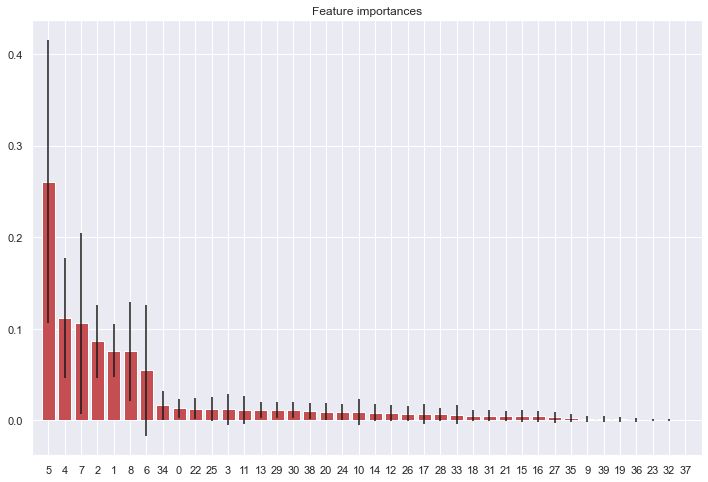

<Figure size 432x288 with 0 Axes>

In [191]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
plt.savefig('featureimportance.jpg')

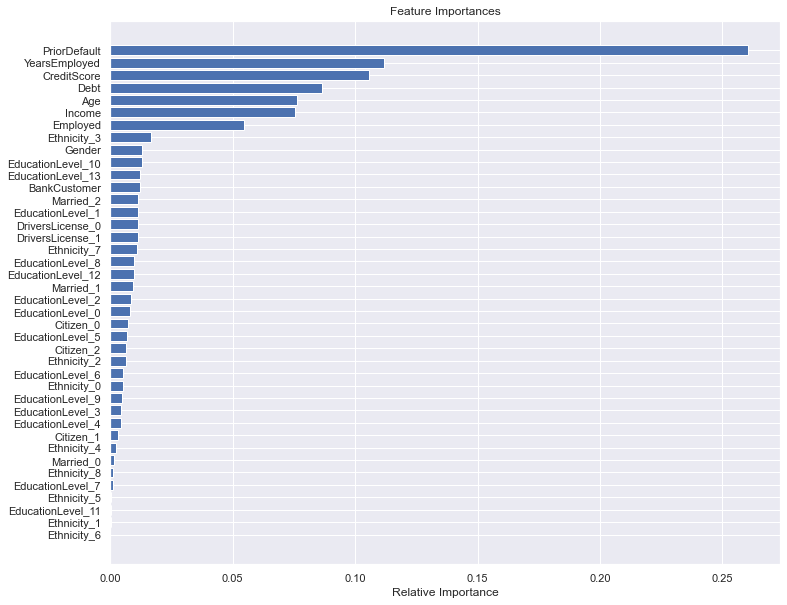

<Figure size 50400x7200 with 0 Axes>

In [192]:
credit_dummies = credit_dummies.drop(['Approved'], axis=1)
features = credit_dummies.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
plt.figure(figsize=(700,100))
plt.savefig('features.jpg')

# Decision Tree

In [193]:
#decision trees
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [194]:
X_train.columns

Index(['Gender', 'Age', 'Debt', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'Income', 'Married_0',
       'Married_1', 'Married_2', 'EducationLevel_0', 'EducationLevel_1',
       'EducationLevel_2', 'EducationLevel_3', 'EducationLevel_4',
       'EducationLevel_5', 'EducationLevel_6', 'EducationLevel_7',
       'EducationLevel_8', 'EducationLevel_9', 'EducationLevel_10',
       'EducationLevel_11', 'EducationLevel_12', 'EducationLevel_13',
       'Citizen_0', 'Citizen_1', 'Citizen_2', 'DriversLicense_0',
       'DriversLicense_1', 'Ethnicity_0', 'Ethnicity_1', 'Ethnicity_2',
       'Ethnicity_3', 'Ethnicity_4', 'Ethnicity_5', 'Ethnicity_6',
       'Ethnicity_7', 'Ethnicity_8'],
      dtype='object')

In [195]:
#model accuracy
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.782608695652174


## Logistic Regression

In [196]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

LogisticRegression()

In [197]:
# Spliting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y ,test_size = 0.3, random_state=72)

In [198]:
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test, y_pred))

Accuracy of logistic regression classifier:  0.8502415458937198
[[ 76  11]
 [ 20 100]]


## Save Model

In [199]:

import pickle
# open a file, where you ant to store the data
file = open('Random_Forest_Credit_Approval', 'wb')

# dump information to that file
pickle.dump(rf, file)

In [200]:

model = open('Random_Forest_Credit_Approval','rb')
forest = pickle.load(model)